# Test demogrpahic stochasticity model 

## Effect of seleciton on varince
### Is the varicne of survival under seleciton substantially different that a binomial distribution?

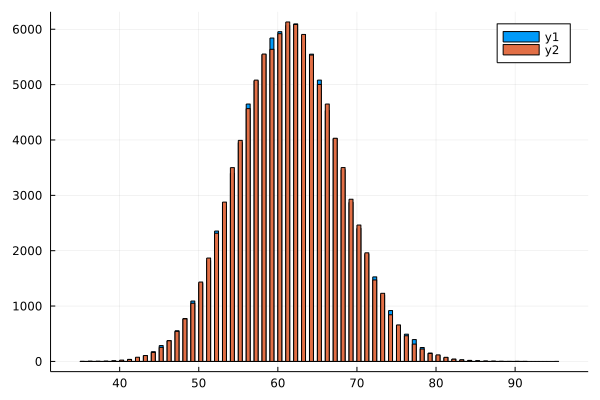

In [72]:
using Distributions
using Plots
N = 200
mu = 5.0
Vle = 1.0
s = 0.1
p(x) = exp(-s*x^2/2.0)
d = Distributions.Normal(mu,sqrt(Vle))
Nmc = 100000
vals = zeros(Nmc)
Threads.@threads for i in 1:Nmc
    z = rand(d,N)
    acc = 0
    for j in 1:N
        if p(z[j]) > rand(1)[1]
            acc+=1
        end 
    end
    vals[i] = acc
end 
Plots.histogram(vals)
prob = mean(vals)/N
d2 = Distributions.Binomial(N,prob)
sim_vals = rand(d2, Nmc)
Plots.histogram!(rand(d2, Nmc))

In [70]:
println(var(sim_vals))
println(var(vals))

4.256789273492735
4.247881134411344


## Apperently no 

The variance is a bit less when there are differn survival probabilities between individuals, but not by much. 


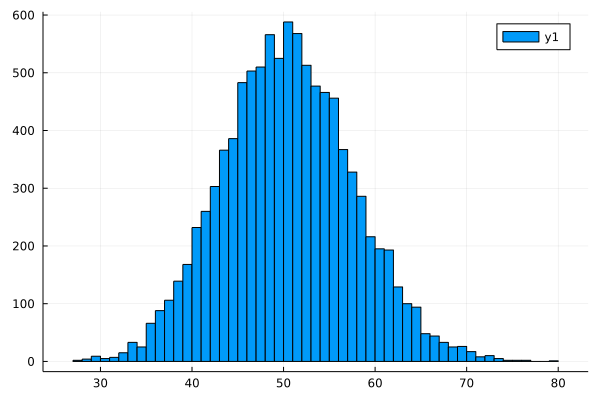

In [78]:
include("

In [41]:
G = reshape(rand(40), 10, 4)
mapslices(x -> rand(x,2), G, dims = 2)

10×2 Matrix{Float64}:
 0.523931  0.979972
 0.645807  0.508901
 0.425846  0.849678
 0.665814  0.598116
 0.661242  0.646675
 0.687598  0.687598
 0.161398  0.866747
 0.236954  0.996678
 0.457419  0.457419
 0.865887  0.950914

In [38]:
inds = broadcast(i -> rand(1:4,2), 1:10)
G = reshape(rand(40), 10, 4)
H1 = broadcast(i -> G[i,inds[i]], 1:10)


10×2 transpose(::Matrix{Float64}) with eltype Float64:
 0.690456   0.464477
 0.0101245  0.257785
 0.18335    0.18335
 0.634823   0.715755
 0.463254   0.533215
 0.543967   0.468582
 0.299597   0.409556
 0.95104    0.95104
 0.14302    0.790704
 0.640018   0.777258

In [43]:
function f(G)
    mapslices(x -> rand(x,2), G, dims = 2)
end 
f(G)
@time f(G)

  0.000041 seconds (91 allocations: 4.375 KiB)


10×2 Matrix{Float64}:
 0.523931  0.523931
 0.711209  0.711209
 0.159103  0.425846
 0.550909  0.598116
 0.661242  0.25933
 0.144411  0.144411
 0.549131  0.744693
 0.236954  0.996678
 0.725842  0.725842
 0.86467   0.950914

# Write fisher variance

In [34]:
using Plots
dsn(p) = [1*p^4,4*p*(1-p)^3,6*p^2*(1-p)^2,4*p^3*(1-p)^1,1*(1-p)^4]
levels(E) = [1*E,0.5*E,0,-0.5*E,-1*E]

levels (generic function with 1 method)

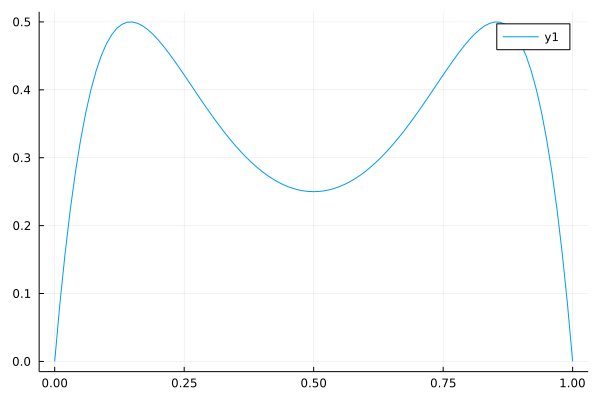

In [35]:
p = 0.8
E = 1.0
mu_(E,p) = sum(dsn(p).*levels(E))
V_(p,E) = sum(dsn(p).*(levels(E).-mu_(E,p)).^2)
p = 0.0:0.01:1.0
Plots.plot(p,V_.(p,1.0))


In [36]:
Nloci = 100
E_ = 0.15
Plots.histogram(broadcast(i -> sum(V_.(rand(Nloci),E_)),1:10000))
Plots.vline!([EV(Nloci,E_)])

LoadError: UndefVarError: EV not defined

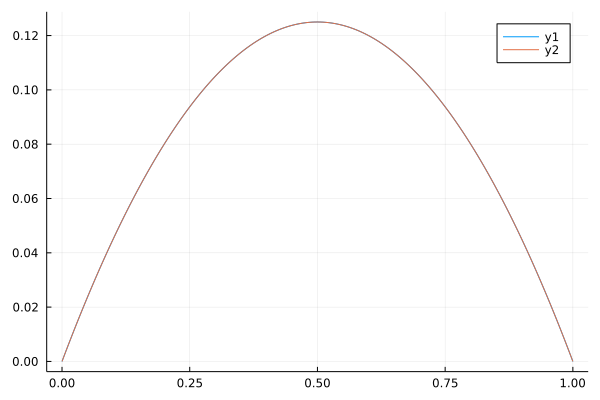

In [42]:
dsn(p) = [p^2,2*p*(1-p),(1-p)^2]
levels(E) = [E,0,-E]
mu_(E,p) = sum(dsn(p).*levels(E))
V_(p,E) = sum(dsn(p).*(levels(E).-mu_(E,p)).^2)
p = 0.0:0.0025:1.0
E_ = 0.5
Plots.plot(p,V_.(p,E_))
Plots.plot!(p, 2*E_^2 .*p.*(1  .-p))

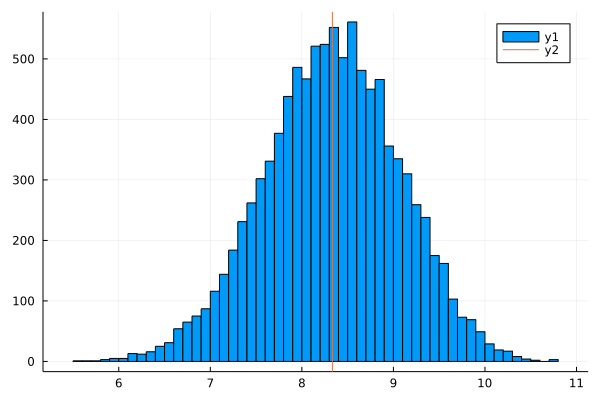

In [43]:
Nloci = 25
E_ = 1.0
Plots.histogram(broadcast(i -> sum(V_.(rand(Nloci),E_)),1:10000))
EV(Nloci,E) = Nloci/3*E^2
Plots.vline!([EV(Nloci,E_)])


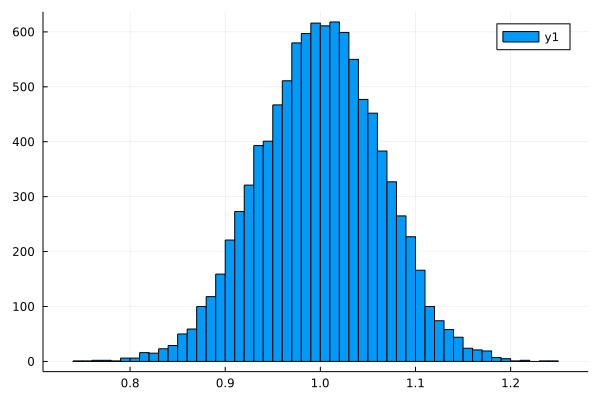

In [41]:
using Roots
Nloci = 50
E_ = Roots.find_zero(E -> EV(Nloci ,E) - 1.0,[0.0,10.0])
Plots.histogram(broadcast(i -> sum(V_.(rand(Nloci),E_)),1:10000))

In [143]:
transpose(reduce(hcat,broadcast(i -> rand([-1,1],4), 1:10)))

10×4 transpose(::Matrix{Int64}) with eltype Int64:
  1   1   1   1
 -1  -1   1  -1
 -1   1   1   1
 -1   1  -1  -1
 -1  -1  -1  -1
  1   1  -1  -1
 -1   1  -1  -1
 -1   1   1   1
 -1  -1  -1  -1
 -1  -1  -1   1

In [7]:
sigmaSHC(n, Ne, mu, alpha, Vs) = 4*n*Ne*mu*alpha/(1+Ne*alpha/Vs)

sigmaSHC (generic function with 1 method)

In [30]:
sigmaSHC(150, 2000, 10^-4, 0.05, 20)

1.0000000000000002

In [49]:
using StatsBase
StatsBase.sample([1,2,3], 3, replace = false)

3-element Vector{Int64}:
 2
 1
 3